In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math

# Part 1.

In [2]:
X_df = pd.read_csv('data.txt', delimiter=',', header=None)
print(X_df.head())
X_df.shape

          0         1         2          3         4          5         6  \
0 -2.166277 -4.020569 -2.224629  -0.744496  0.187894  10.820724 -1.838109   
1  0.466220 -0.984241  8.120305   1.769738  5.103642  -7.579323 -0.636731   
2  8.870568  4.534762  5.076998   0.803536  9.551406  -4.086241  6.211424   
3 -0.794916 -0.191408  8.084670   0.813292  2.307681  -8.321887 -2.995845   
4 -0.439401 -0.514456 -7.736412  11.649598  9.093758   0.288513 -3.552052   

           7         8         9  
0   4.572097  5.621567 -2.193658  
1 -11.535472 -8.444525  9.213106  
2   3.353619  3.872890 -4.729020  
3  -7.096448 -6.975285  8.582852  
4   5.786757  4.540192 -2.991714  


(500, 10)

I use principal component analysis to map the data to 2 dimensions and then visualize the data as scatter plot. I re-use code from the excerice 2.

In [3]:
# PCA with z-score normalization:
from scipy.stats import zscore

X=X_df.values
m = X.shape[0]

# z-score standardization
Zs = zscore(X, axis=0)

# Compute covariance matrix:
Cs = Zs.T@Zs/(m-1)
# Eigendecompose covariance matrix:
evalss, evecss = np.linalg.eigh(Cs)
# sort eigenvalues in decreasing order
idxs = np.argsort(evalss)[::-1]
evecss = evecss[:,idxs]
#pick eigenvectors corresponding to 2 largest eigenvalues
Ms = evecss[:,:2].T
# Project your data:
Zs_mapped = (Ms@Zs.T).T

In [4]:
evalss = evalss[idxs]
sumevalss= sum(evalss)
#proportion of variance
print('The proportion of variance explained in projections (with z-score normalization)', (evalss[0]+ evalss[1])/sumevalss)

The proportion of variance explained in projections (with z-score normalization) 0.7451671470666301


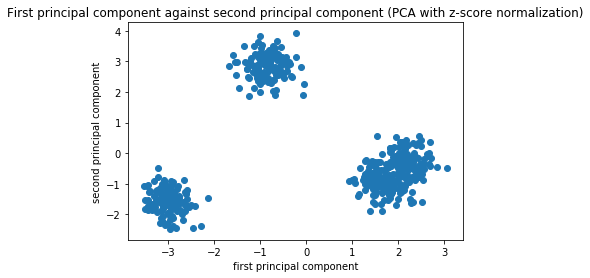

In [5]:
plt.scatter(Zs_mapped[:,0], Zs_mapped[:,1])
plt.title("First principal component against second principal component (PCA with z-score normalization)")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

When we look at the visualization, we can identify three clusters.

# Part 2.
I run K-means clustering on the original data for different values of K and calculate the corresponding Silhouette Scores. 

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

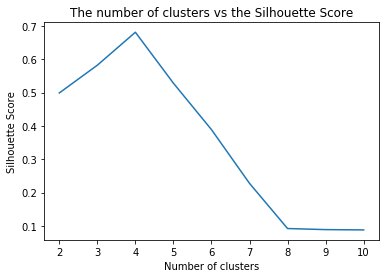

In [7]:
scores=np.zeros(9)
for i in range(0,9):
    kmeans=KMeans(n_clusters=i+2)
    labels=kmeans.fit_predict(X)
    scores[i] = silhouette_score(X, labels)

plt.plot(range(2,11),scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("The number of clusters vs the Silhouette Score")
plt.show()

As we can see above, the maximum Silhouette Score can be achievet with K = 4. This is in contradiction with our earlier conclusion based on PCA. So, let's color our earlier scatter plot of the PCA projection so that members of each cluster
are colored differently. 

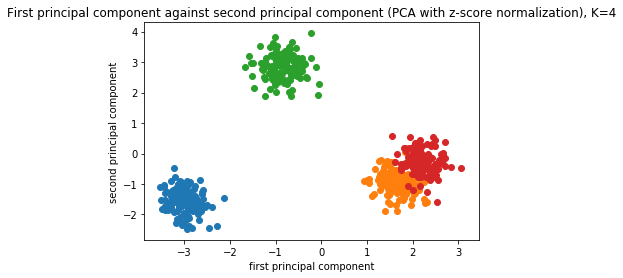

In [8]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(X)

ind_0 = np.where(labels==0)
ind_1 = np.where(labels==1)
ind_2 = np.where(labels==2)
ind_3 = np.where(labels==3)
plt.scatter(Zs_mapped[ind_0,0], Zs_mapped[ind_0,1])
plt.scatter(Zs_mapped[ind_1,0], Zs_mapped[ind_1,1])
plt.scatter(Zs_mapped[ind_2,0], Zs_mapped[ind_2,1])
plt.scatter(Zs_mapped[ind_3,0], Zs_mapped[ind_3,1])
plt.title("First principal component against second principal component (PCA with z-score normalization), K=4")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()



In [9]:
labels_df=pd.DataFrame(data=labels)
labels_df[0].value_counts()

3    125
2    125
1    125
0    125
Name: 0, dtype: int64

Now we can see that when K=4, the third cluster will be divided to two. I don't know what this data is presentig but based on visualization, I assume that K=3 would capture the true structure of the data better.

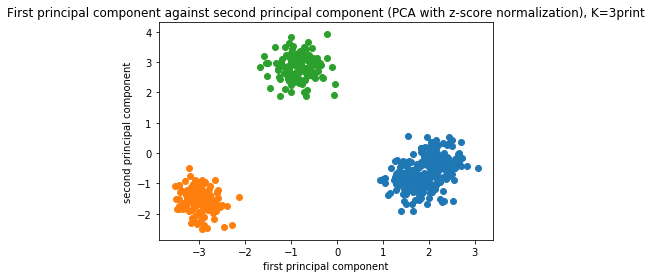

In [10]:
kmeans=KMeans(n_clusters=3)
labels=kmeans.fit_predict(X)

ind_0 = np.where(labels==0)
ind_1 = np.where(labels==1)
ind_2 = np.where(labels==2)
plt.scatter(Zs_mapped[ind_0,0], Zs_mapped[ind_0,1])
plt.scatter(Zs_mapped[ind_1,0], Zs_mapped[ind_1,1])
plt.scatter(Zs_mapped[ind_2,0], Zs_mapped[ind_2,1])
plt.title("First principal component against second principal component (PCA with z-score normalization), K=3print")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [11]:
labels_df=pd.DataFrame(data=labels)
labels_df[0].value_counts()

0    250
2    125
1    125
Name: 0, dtype: int64

As we can see, now one of the clusters has twice a size compared to the two others. Thus it depends on what should be gained with the clustering which model serves that purpose best.

# Part 3.
Now I continue with Iris data set. I reuse code from exercise 2 and visualize the data with scatter plot of 2-dimensional PCA
projection.

In [12]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,
                 names=['sepal length', 'sepal width', 'petal length', 'petal width','species'] )
print(df.head())

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [13]:
X = df.loc[:, "sepal length":"petal width"]
X = X.values 
X.shape

(150, 4)

In [14]:
# z-score standardization
Zs = zscore(X, axis=0)

# Compute covariance matrix:
Cs = Zs.T@Zs/(m-1)
# Eigendecompose covariance matrix:
evalss, evecss = np.linalg.eigh(Cs)
# sort eigenvalues in decreasing order
idxs = np.argsort(evalss)[::-1]
evecss = evecss[:,idxs]
#pick eigenvectors corresponding to 2 largest eigenvalues
Ms = evecss[:,:2].T
# Project your data:
Zs_mapped = (Ms@Zs.T).T

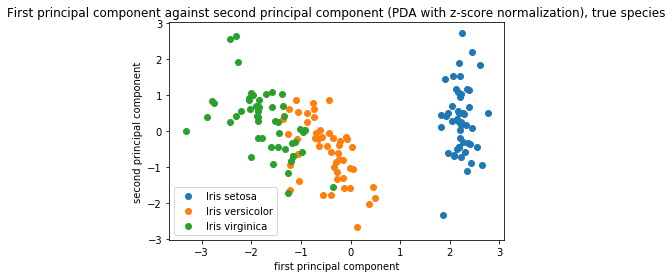

In [15]:
labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

setosaZs=np.array(Zs_mapped[:50])
versicolorZs=np.array(Zs_mapped[50:100])
virginicaZs=np.array(Zs_mapped[100:150])

plt.scatter(setosaZs[:,0], setosaZs[:,1])
plt.scatter(versicolorZs[:,0], versicolorZs[:,1])
plt.scatter(virginicaZs[:,0], virginicaZs[:,1])
plt.legend(labels)
plt.title("First principal component against second principal component (PDA with z-score normalization), true species")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

From now on I pretend that I do not know the true species.

Part 1: I assume that I am told in advance, that there are three different species I should try to find
from the data. I cluster the original 4-dimensional Iris data into 3 clusters with K-means method and create
another PCA scatter plot, where I visualize these three clusters.

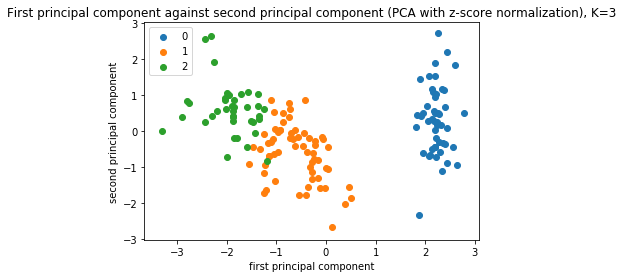

In [27]:
kmeans=KMeans(n_clusters=3)
labels_pred=kmeans.fit_predict(X)

ind_0 = np.where(labels_pred==0)
ind_1 = np.where(labels_pred==1)
ind_2 = np.where(labels_pred==2)
plt.scatter(Zs_mapped[ind_0,0], Zs_mapped[ind_0,1])
plt.scatter(Zs_mapped[ind_1,0], Zs_mapped[ind_1,1])
plt.scatter(Zs_mapped[ind_2,0], Zs_mapped[ind_2,1])
labels = ['0', '1', '2']
plt.legend(labels)
plt.title("First principal component against second principal component (PCA with z-score normalization), K=3")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

As we can see, the clustering found by K-means agree quite well with the true class labels. All Iris setosas are correctly in one cluster but there are few mistakes in the borderzone of Iris virginica and Irish versicolor. I calculate the misclassification rate.

In [28]:
from sklearn.metrics import accuracy_score
y = df.loc[:, "species"]
y = y.values
species_map = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
y_numeric = [species_map[x] for x in y]
y_true = np.array(y_numeric)
acc=accuracy_score(y_true, labels_pred)
mis= 1-acc
print('Misclassification rate: ', mis)

Misclassification rate:  0.10666666666666669


The misclassification rate is 0,11. (K-means method may give the numbers of clusters in different order in different rounds, thus the mapping has to be checked every time).

Part 2: Next I assume that I have no prior information about the number of clusters in the data. 

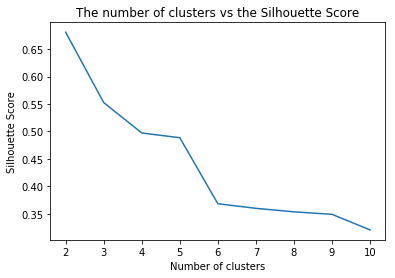

In [29]:
scores=np.zeros(9)
for i in range(0,9):
    kmeans=KMeans(n_clusters=i+2)
    labels=kmeans.fit_predict(X)
    scores[i] = silhouette_score(X, labels)

plt.plot(range(2,11),scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("The number of clusters vs the Silhouette Score")
plt.show()

The maximum Silhouette Score can be achievet with K = 2. I visualize the K-means clustering for this value of K.

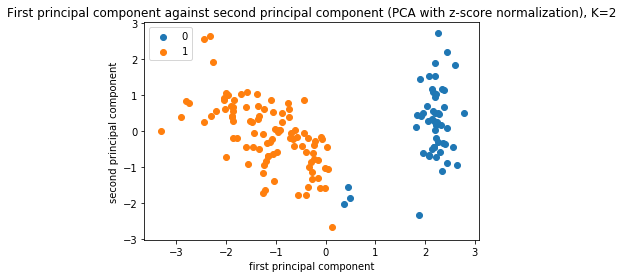

In [31]:
kmeans=KMeans(n_clusters=2)
labels_pred=kmeans.fit_predict(X)

ind_0 = np.where(labels_pred==0)
ind_1 = np.where(labels_pred==1)
plt.scatter(Zs_mapped[ind_0,0], Zs_mapped[ind_0,1])
plt.scatter(Zs_mapped[ind_1,0], Zs_mapped[ind_1,1])
labels = ['0', '1']
plt.legend(labels)
plt.title("First principal component against second principal component (PCA with z-score normalization), K=2")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [32]:
species_map = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
y_numeric = [species_map[x] for x in y]
y_true = np.array(y_numeric)
acc=accuracy_score(y_true, labels_pred)
mis= 1-acc
print('Misclassification rate: ', mis)

Misclassification rate:  0.3533333333333334


This time, when K=2, the clustering found by K-means does not agree so well with the true species. As we could guess, it combines Iris versicolor and Iris virginica in the same cluster, but there are also three mistakes in clustering Iris setosa. The misclassification rate with K=2 is 0,35. (Here is the same problem: the mapping between true and predicted labels has to be checked every time after running K-means method)